# Test ML NaN

### Test sur vote_average

In [2]:
import pandas as pd
file_path = r"C:\Users\Lulu\Documents\Git\Projet_2\df_clean\full_df.csv"
 # Lire le fichier CSV
df_full = pd.read_csv(file_path, sep='\t')
df_full.head(100)

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,backdrop_path,budget,original_language,popularity,poster_path,production_countries,release_date,revenue,spoken_languages,status,video,vote_average,vote_count,production_companies_name,production_companies_country
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,['US'],1897-01-01,0.0,['xx'],Released,False,5.526,20.0,['Veriscope Company'],NaN
2,tt0000502,Bohemios,Bohemios,1905.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70.0,/6vI31TbqaSLXNVVZhm1WGrATijZ.jpg,0.0,en,1.672,/4CHQV5nRoHwpaS8LaGNxTh8V0ad.jpg,['AU'],1906-12-26,0.0,['xx'],Released,False,5.375,28.0,"['Johnson and Gibson', 'J. & N. Tait']","['', '']"
4,tt0000591,The Prodigal Son,L'enfant prodigue,1907.0,90.0,NaN,0.0,fr,0.600,NaN,['FR'],1907-06-19,0.0,['xx'],Released,False,0.000,0.0,['Pathé Frères'],['FR']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,tt0001785,The Miner's Curse,The Miner's Curse,1911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,tt0001790,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,1913.0,60.0,NaN,0.0,en,0.874,NaN,['FR'],1913-01-01,0.0,['fr'],Released,False,1.000,1.0,['Pathé Frères'],NaN
97,tt0001803,The Mystery of a Hansom Cab,The Mystery of a Hansom Cab,1911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,tt0001812,Oedipus Rex,Oedipus Rex,1911.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


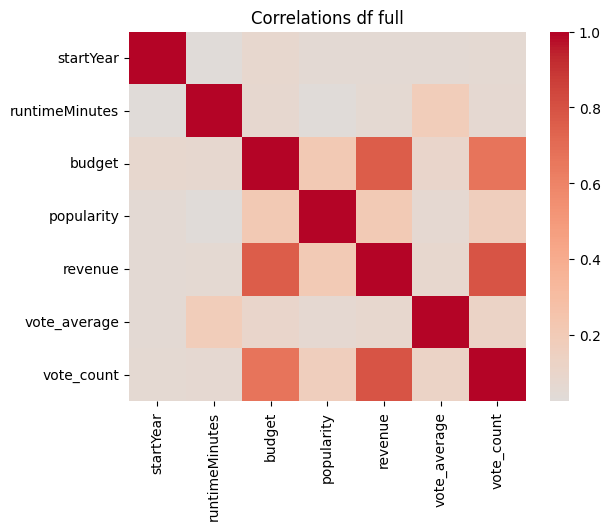

In [3]:
# Calcul correlation 
import seaborn as sns
import matplotlib.pyplot as plt

df_full1 = df_full.select_dtypes(include=[float, int])

corr_matrix = df_full1.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center = 0)
plt.title("Correlations df full")
plt.show()

In [4]:
# Comptage Nan dans vote average
df_full['vote_average'].isna().value_counts()

vote_average
True     351310
False    167949
Name: count, dtype: int64

In [5]:
# Nettoyage des nan pour le ML
df_clean = df_full.dropna()
df_clean['vote_average'].isna().value_counts()

vote_average
False    35582
Name: count, dtype: int64

In [6]:
# Creation df ou les valeures nulles de vote average serons remplacees

df_nan = df_full[df_full['vote_average'].isna()]
#df_nan = df2018.isna()
df_nan['vote_average'].isna().sum()

np.int64(351310)

## Entrainement du modele 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Elimination des colonnes string et garder aue les int 
X = df_clean.drop(columns=['tconst', 'primaryTitle', 'originalTitle', 'backdrop_path', 'original_language', 'poster_path',
                           'production_countries', 'release_date', 'status', 'spoken_languages', 'video', 'vote_average',
                            'production_companies_name', 'production_companies_country'])
y= df_clean['vote_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, shuffle = True, random_state=42)

modelRL2 = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", modelRL2.score(X_train, y_train))
print("Score for the Test dataset :", modelRL2.score(X_test, y_test))


Score for the Train dataset : 0.1010555430138319
Score for the Test dataset : 0.09290823646533941


Je constate que le score est vraiment mauvais, il faut donc transformer certaines colonnes avec des get_dummies serait une idee. 

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35582 entries, 3 to 519248
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tconst                        35582 non-null  object 
 1   primaryTitle                  35582 non-null  object 
 2   originalTitle                 35582 non-null  object 
 3   startYear                     35582 non-null  float64
 4   runtimeMinutes                35582 non-null  float64
 5   backdrop_path                 35582 non-null  object 
 6   budget                        35582 non-null  float64
 7   original_language             35582 non-null  object 
 8   popularity                    35582 non-null  float64
 9   poster_path                   35582 non-null  object 
 10  production_countries          35582 non-null  object 
 11  release_date                  35582 non-null  object 
 12  revenue                       35582 non-null  float64
 13  spoke

In [14]:
X = df_clean[['startYear', 'budget', 'revenue', 'vote_count']]
y= df_clean['vote_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, shuffle = True, random_state=42)

modelRL2 = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", modelRL2.score(X_train, y_train))
print("Score for the Test dataset :", modelRL2.score(X_test, y_test))


Score for the Train dataset : 0.05830837656613852
Score for the Test dataset : 0.05070446526128358


### Import et merge DF genres

In [15]:
file_path2 = r"C:\Users\Lulu\Documents\Git\Projet_2\df_clean\df_genres.csv"
 # Lire le fichier CSV
df_genre = pd.read_csv(file_path2, sep='\t')
df_genre.head(100)

,tconst,genres
0,tt0000009,Romance
1,tt0000147,Documentary
2,tt0000147,News
3,tt0000147,Sport
4,tt0000574,Action
...,...,...
95,tt0002305,War
96,tt0002361,Drama
97,tt0002375,Drama
98,tt0002375,History


In [16]:
df_reco1 = pd.merge(df_full,
                df_genre,
                how="inner",
                left_on='tconst',
                right_on='tconst',
                sort = True)

df_reco1.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,backdrop_path,budget,original_language,popularity,poster_path,...,release_date,revenue,spoken_languages,status,video,vote_average,vote_count,production_companies_name,production_companies_country,genres
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,45.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romance
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,1897-01-01,0.0,['xx'],Released,False,5.526,20.0,['Veriscope Company'],NaN,Documentary
2,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,1897-01-01,0.0,['xx'],Released,False,5.526,20.0,['Veriscope Company'],NaN,News
3,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,1897-01-01,0.0,['xx'],Released,False,5.526,20.0,['Veriscope Company'],NaN,Sport
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70.0,/6vI31TbqaSLXNVVZhm1WGrATijZ.jpg,0.0,en,1.672,/4CHQV5nRoHwpaS8LaGNxTh8V0ad.jpg,...,1906-12-26,0.0,['xx'],Released,False,5.375,28.0,"['Johnson and Gibson', 'J. & N. Tait']","['', '']",Action


In [17]:
df_reco1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764863 entries, 0 to 764862
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tconst                        764863 non-null  object 
 1   primaryTitle                  764862 non-null  object 
 2   originalTitle                 764862 non-null  object 
 3   startYear                     683288 non-null  float64
 4   runtimeMinutes                593664 non-null  float64
 5   backdrop_path                 221679 non-null  object 
 6   budget                        361783 non-null  float64
 7   original_language             361783 non-null  object 
 8   popularity                    361783 non-null  float64
 9   poster_path                   331331 non-null  object 
 10  production_countries          361783 non-null  object 
 11  release_date                  355486 non-null  object 
 12  revenue                       361783 non-nul

Get Dummies pour la colonne genre

In [19]:
df_reco2=pd.concat([df_reco1,pd.get_dummies(df_reco1[['genres']])],axis=1)
df_reco2.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,backdrop_path,budget,original_language,popularity,poster_path,...,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Science Fiction,genres_Sport,genres_TV Movie,genres_Talk-Show,genres_Thriller,genres_War,genres_Western
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,45.0,NaN,NaN,NaN,NaN,NaN,...,False,True,False,False,False,False,False,False,False,False
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,False,False,False,False,False,False,False,False,False,False
2,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,False,False,False,False,False,False,False,False,False,False
3,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,False,False,False,False,True,False,False,False,False,False
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70.0,/6vI31TbqaSLXNVVZhm1WGrATijZ.jpg,0.0,en,1.672,/4CHQV5nRoHwpaS8LaGNxTh8V0ad.jpg,...,False,False,False,False,False,False,False,False,False,False


In [27]:
df_reco2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764863 entries, 0 to 764862
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tconst                        764863 non-null  object 
 1   primaryTitle                  764862 non-null  object 
 2   originalTitle                 764862 non-null  object 
 3   startYear                     683288 non-null  float64
 4   runtimeMinutes                593664 non-null  float64
 5   backdrop_path                 221679 non-null  object 
 6   budget                        361783 non-null  float64
 7   original_language             361783 non-null  object 
 8   popularity                    361783 non-null  float64
 9   poster_path                   331331 non-null  object 
 10  production_countries          361783 non-null  object 
 11  release_date                  355486 non-null  object 
 12  revenue                       361783 non-nul

In [29]:
# Remplacement de True et false dans les genres 

df_reco2 = df_reco2.replace({'True': 1, 'False': 0, True: 1, False: 0})
# Attention ne pas mettre true et false entre guillemets uniquement
df_reco2.head()

C:\Users\Lulu\AppData\Local\Temp\ipykernel_3160\1754524785.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reco2 = df_reco2.replace({'True': 1, 'False': 0, True: 1, False: 0})


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,backdrop_path,budget,original_language,popularity,poster_path,...,genres_Reality-TV,genres_Romance,genres_Sci-Fi,genres_Science Fiction,genres_Sport,genres_TV Movie,genres_Talk-Show,genres_Thriller,genres_War,genres_Western
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,45.0,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,0,0,0,0,0,0,0,0,0,0
2,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,0,0,0,0,0,0,0,0,0,0
3,tt0000147,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897.0,100.0,NaN,0.0,en,0.958,/nL7aYlGYJZU7Gx8kFu9bTp3QYRu.jpg,...,0,0,0,0,1,0,0,0,0,0
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,70.0,/6vI31TbqaSLXNVVZhm1WGrATijZ.jpg,0.0,en,1.672,/4CHQV5nRoHwpaS8LaGNxTh8V0ad.jpg,...,0,0,0,0,0,0,0,0,0,0


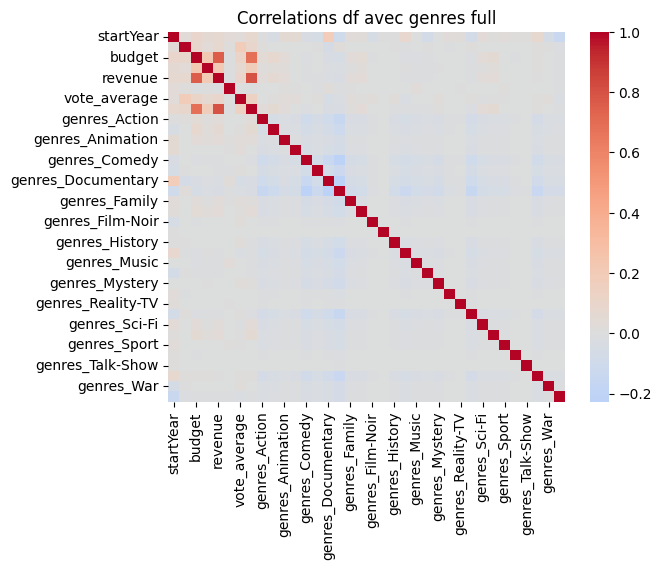

In [30]:
# Heat map correlations 

df_reco3 = df_reco2.select_dtypes(include=[float, int])

corr_matrix = df_reco3.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center = 0)
plt.title("Correlations df avec genres full")
plt.show()

In [35]:
# Utilisation Df reco 3 et drop na 

df_reco3 = df_reco3.dropna()
df_reco3.isna().value_counts()
list_col_df = list(df_reco3.columns)

In [36]:
print(list_col_df)

['startYear', 'runtimeMinutes', 'budget', 'popularity', 'revenue', 'video', 'vote_average', 'vote_count', 'genres_Action', 'genres_Adventure', 'genres_Animation', 'genres_Biography', 'genres_Comedy', 'genres_Crime', 'genres_Documentary', 'genres_Drama', 'genres_Family', 'genres_Fantasy', 'genres_Film-Noir', 'genres_Game-Show', 'genres_History', 'genres_Horror', 'genres_Music', 'genres_Musical', 'genres_Mystery', 'genres_News', 'genres_Reality-TV', 'genres_Romance', 'genres_Sci-Fi', 'genres_Science Fiction', 'genres_Sport', 'genres_TV Movie', 'genres_Talk-Show', 'genres_Thriller', 'genres_War', 'genres_Western']


In [38]:

X = df_reco3[['runtimeMinutes', 'budget', 'popularity', 'revenue', 'vote_count', 'genres_Action'
               ]]
y= df_reco3['vote_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, shuffle = True, random_state=42)

modelRL2 = LinearRegression().fit(X_train, y_train)

print("\nScore for the Train dataset :", modelRL2.score(X_train, y_train))
print("Score for the Test dataset :", modelRL2.score(X_test, y_test))


Score for the Train dataset : 0.057979735309222735
Score for the Test dataset : 0.009299808930483211


Malgres l'ajout des genres les resultats sont tout aussi desastreux. 
Idee -- > ajout scenaristes, realisateurs et acteurs. 